## Comparison of our own software and standard software (AUTOPIA)
- AUTOPIA has its own test pattern for MTF testing, but we don't (or it expensive)
- However, we know that each detector has a performance for modulation.
- We then convert the value (graph) from AUTOPIA for each detector.
- We obtain a pseudo value if tested with the MTF bar (that we have).
- Then, we identify the error between us and them.
- To obtain the closest value to theirs.
- We only have three rooms (detectors) available for use because otherwise, the modulation of the 2nd exceeds 100% due to processing.
- In comparison, we skip the first LP because in AUTOPIA it is not at 100% (lower than our value). Anyway, if we were to add it up, it would exceed 100%.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [18]:
MTFLP = np.array([0, 1, 1.11, 1.23, 1.37, 1.52, 1.69, 1.88, 2.09, 2.32, 2.58, 2.87, 3.19, 3.54, 3.93, 4.37, 4.86])[1:]
AUTOPIALP = np.array([0.5, 0.56, 0.63, 0.71, 0.8, 0.9, 1, 1.12, 1.25, 1.4, 1.6, 1.8, 2, 2.24, 2.5, 2.8, 3.15, 3.355, 4, 4.5, 5])
columns = ["DX1avg", "DX2avg", "SW2avg"]
mtf_df = pd.read_excel("BAR_eval/MTF_data_max.xlsx")
auto_df = pd.read_excel("BAR_eval/AUTOPIA_data.xlsx")

In [19]:
mtf_data = []
auto_data = []
for col in columns :
    mtf_data.append(mtf_df[f"{col}"].to_numpy()[1:])
    auto_data.append(auto_df[f"{col}"].to_numpy())

- We then convert the value (graph) from AUTOPIA for each detector.
- We obtain a pseudo value if tested with the MTF bar (that we have).

In [20]:
# creating graph from AUTOPIA for each detector
def polynomial(y) :
    """
    Return polynomial b0, b1, b2 from AUTOPIA mtf values 
    y = b0 + b1x + b2x^2 ; y=mtf, x=lp
    """
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(AUTOPIALP.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    return model.intercept_, model.coef_[1:]

def predict(weights, x) :
    return weights[0] + weights[1][0]*x + weights[1][1]*(x**2)

def mse_error(y1, y2) :
    squared_diff = (y1 - y2)**2
    mse = np.mean(squared_diff)
    return mse

def plot_result(idx, mtf_data) :
    w = polynomial(auto_data[idx])
    psudo1 = predict(w, MTFLP)

    plt.figure(figsize=(40, 8))
    plt.suptitle(f"{columns[idx]}", fontsize=18)
    plt.subplot(1, 3, 1)
    plt.title("Us sotfware")
    plt.plot(MTFLP, mtf_data[idx], label='MTF Data')
    plt.scatter(MTFLP, mtf_data[idx])
    plt.xticks(MTFLP, rotation=90)
    plt.grid(True)
    plt.xlabel('MTF LP')
    plt.ylabel('MTF Value')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.title("AUTOPIA")
    plt.plot(AUTOPIALP, auto_data[idx], label='AUTOPIA Data', c="red")
    plt.scatter(AUTOPIALP, auto_data[idx], c="red")
    plt.plot(MTFLP, psudo1, label='Pseudo MTF', linestyle="--", c="k")
    plt.xlabel('AUTOPIA LP')
    plt.ylabel('AUTOPIA Value')
    plt.xticks(AUTOPIALP, rotation=90)
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 3, 3)
    err = mse_error(psudo1, mtf_data[idx])
    plt.title(f"Pseudo MTF from AUTOPIA, MSE: {err:.4f}")
    plt.plot(MTFLP, psudo1, label='Pseudo MTF', linestyle="--", c="k")
    plt.plot(MTFLP, mtf_data[idx], label='MTF Data')
    plt.xlabel('MTF LP')
    plt.ylabel('MTF Value')
    plt.xticks(MTFLP, rotation=90)
    plt.grid(True)
    plt.legend()
    plt.show()
    return err

### Max method

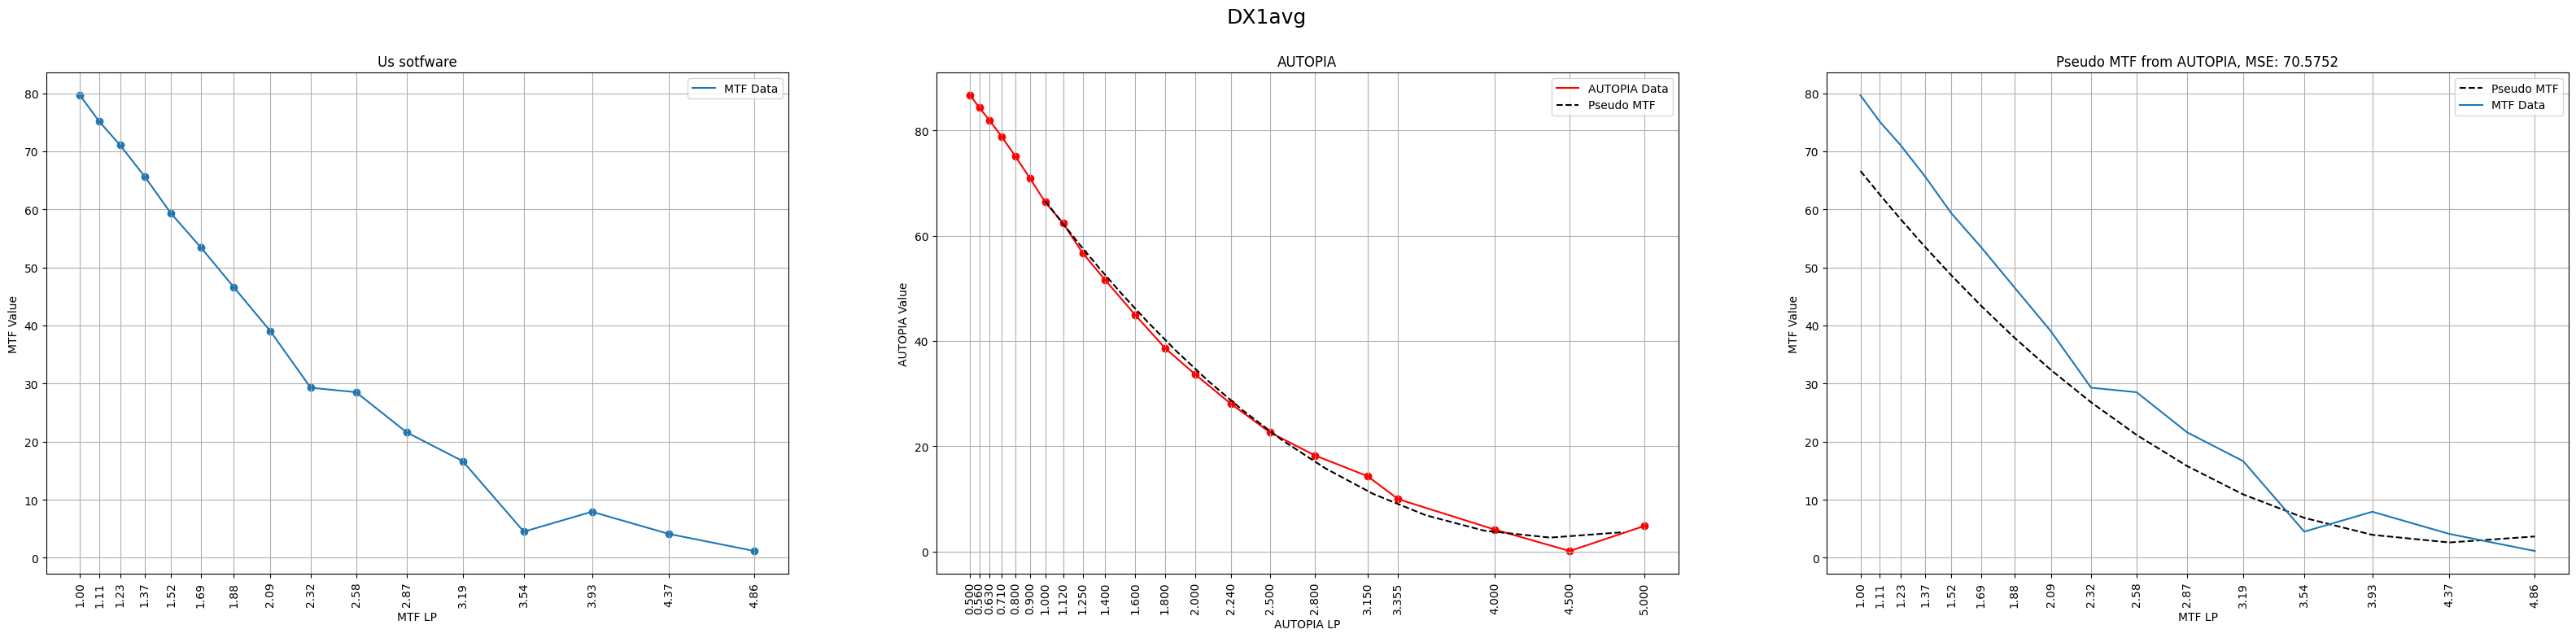

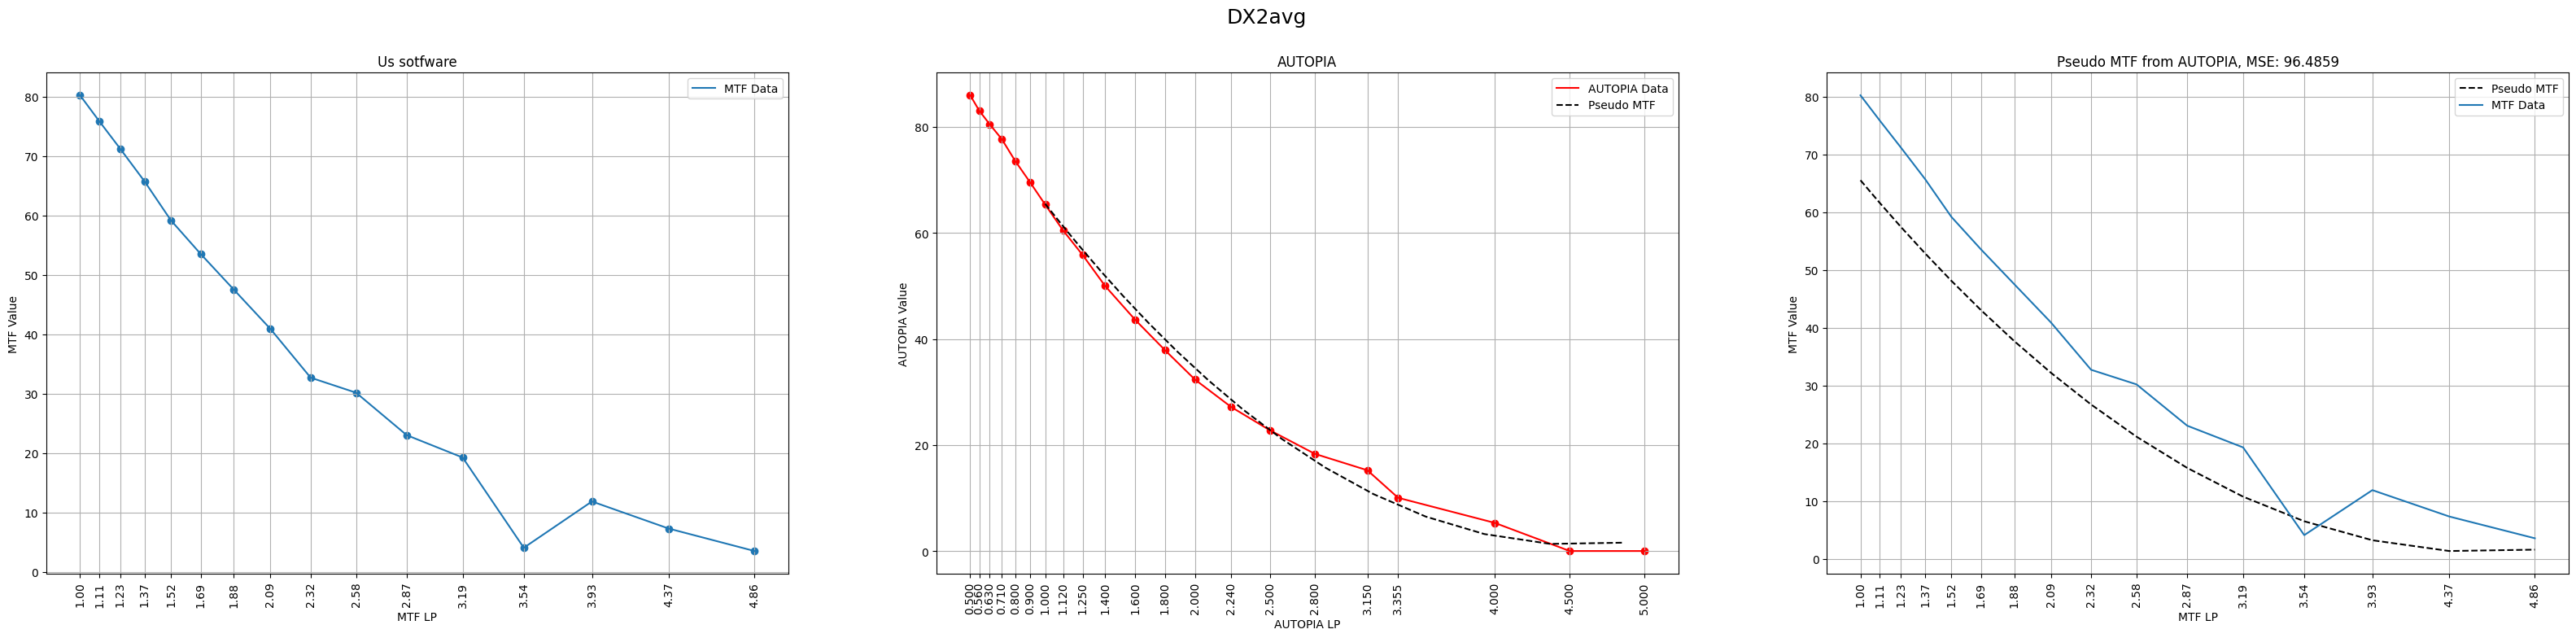

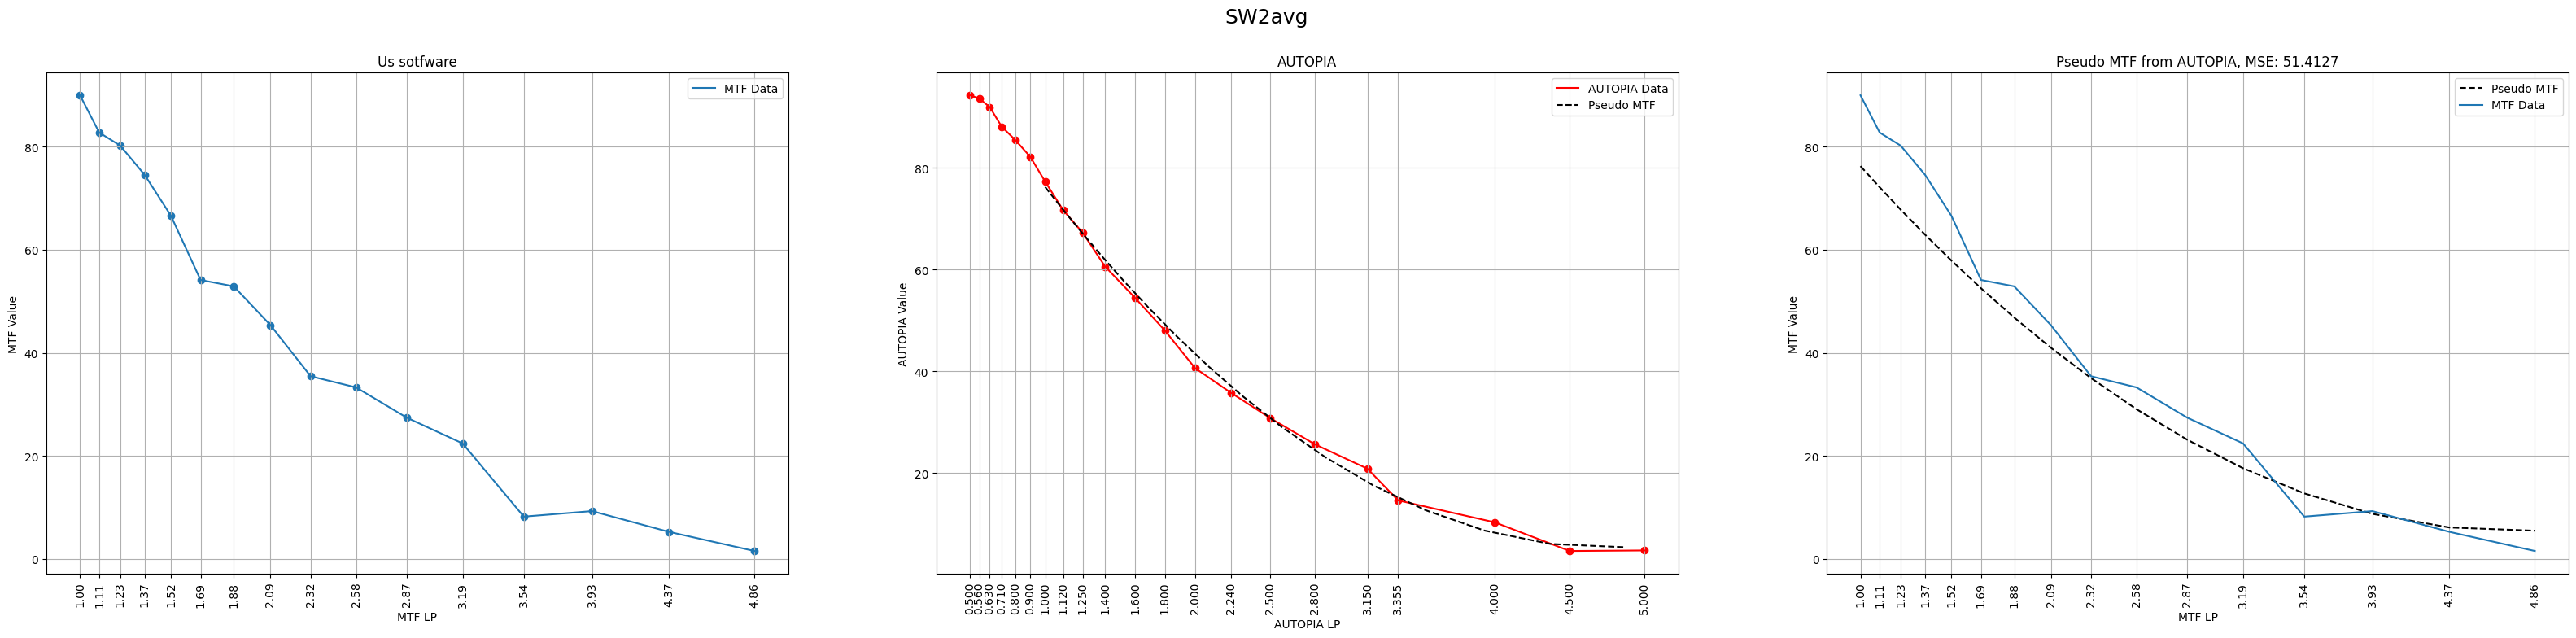

Error for Max method: 72.8246


In [21]:
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data))
print(f"Error for Max method: {np.array(avg_err).mean():.4f}")

### Mean 0.15 method

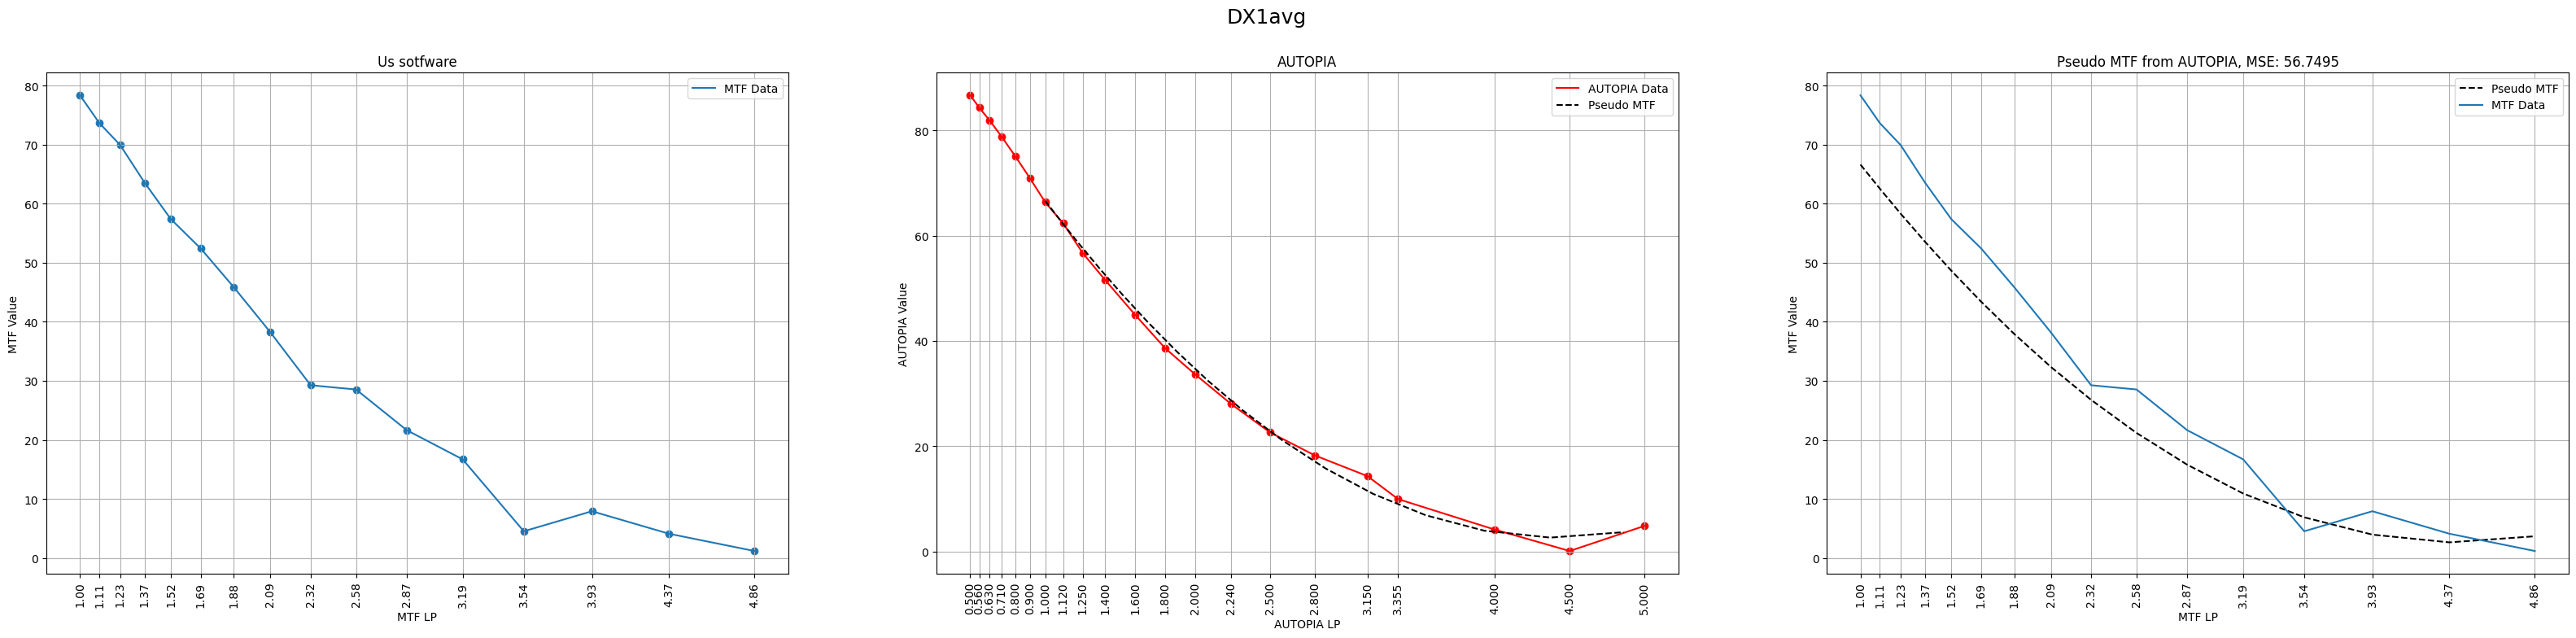

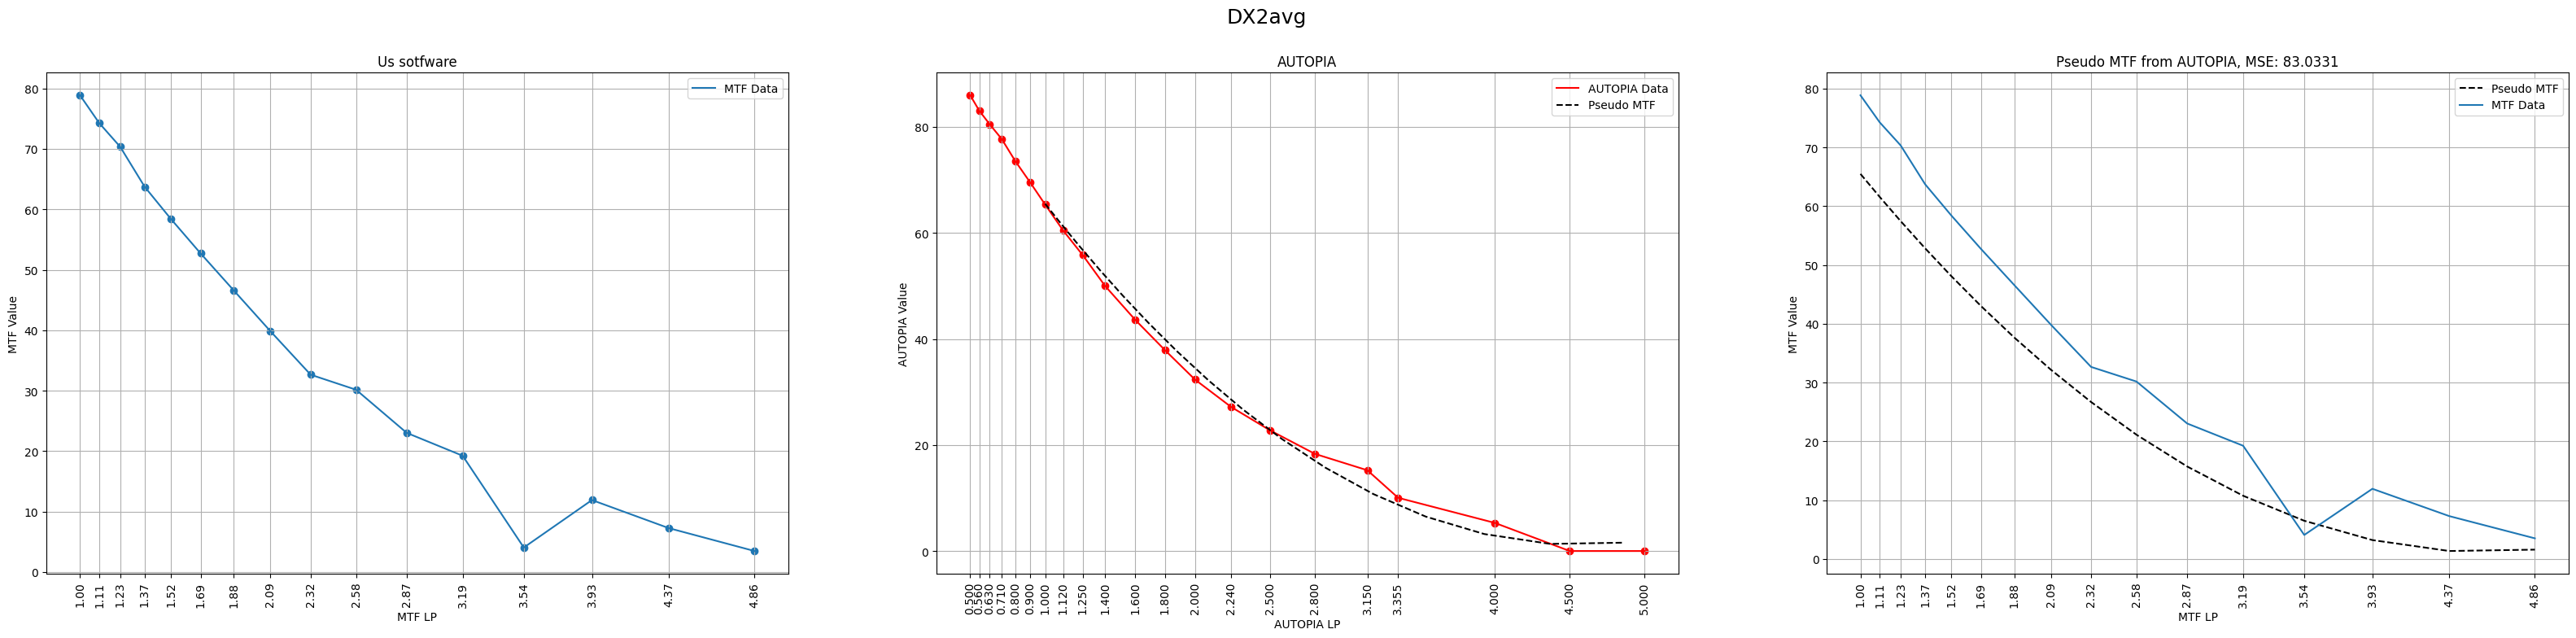

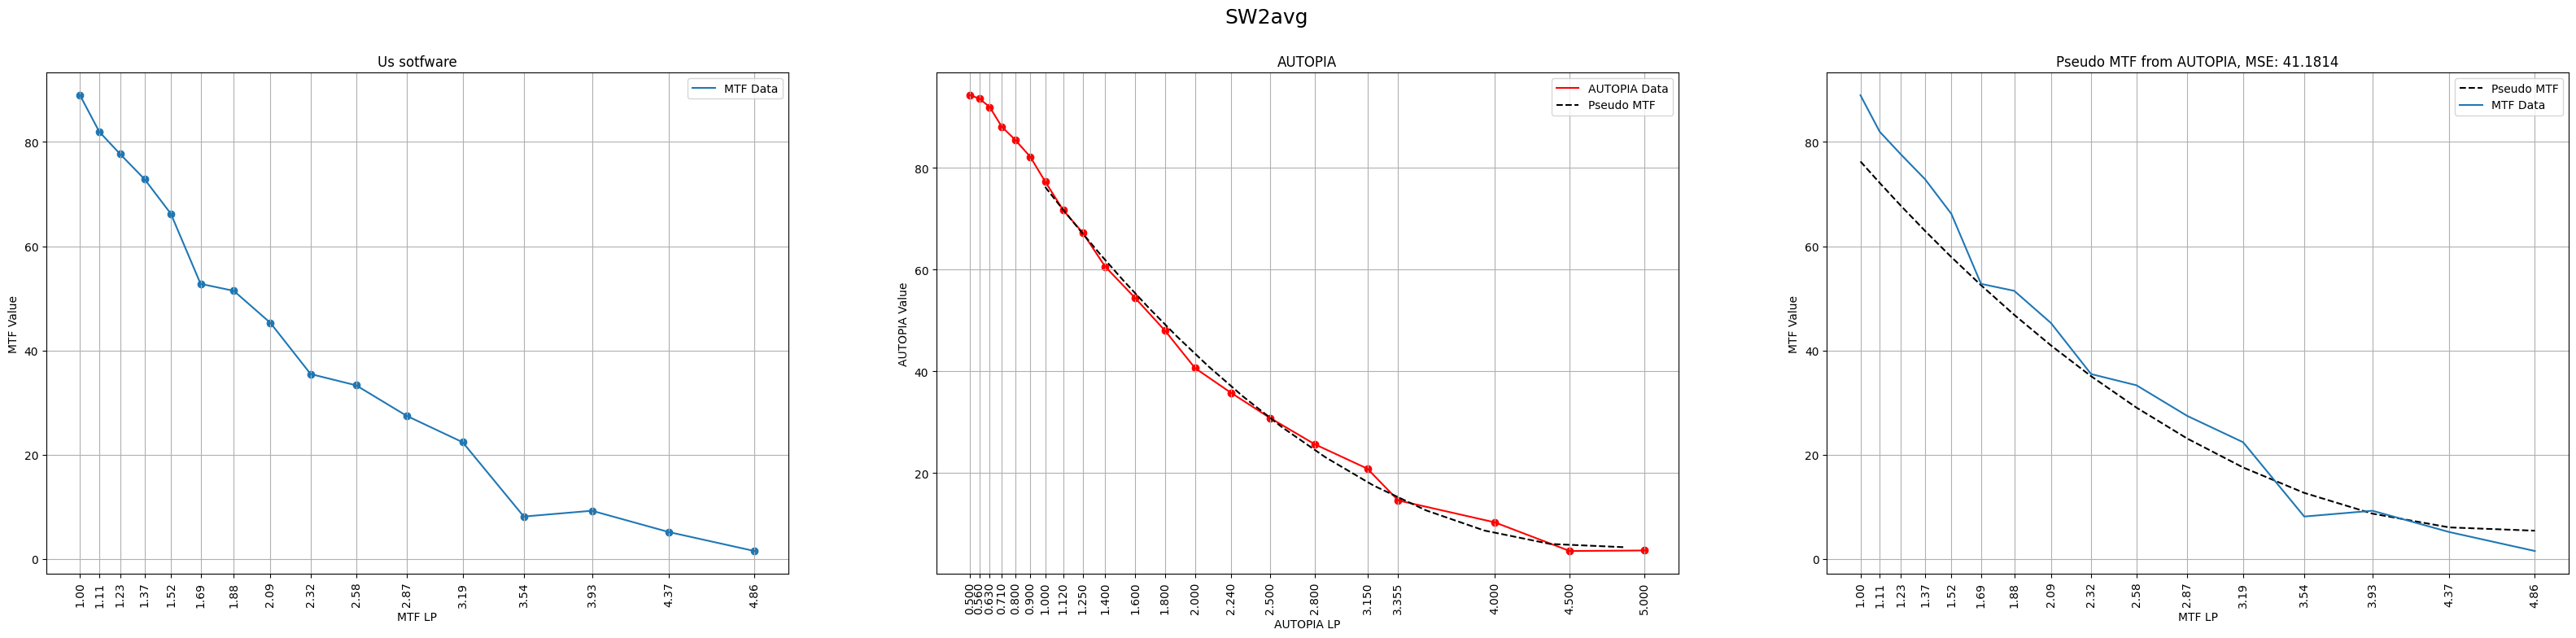

Error for Mean0.15 method: 60.3213


In [22]:
mtf_df015 = pd.read_excel("BAR_eval/MTF_data_0.15mean.xlsx")
mtf_data015 = []
for col in columns :
    mtf_data015.append(mtf_df015[f"{col}"].to_numpy()[1:])
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data015))
print(f"Error for Mean0.15 method: {np.array(avg_err).mean():.4f}")

### Mean 0.20 method

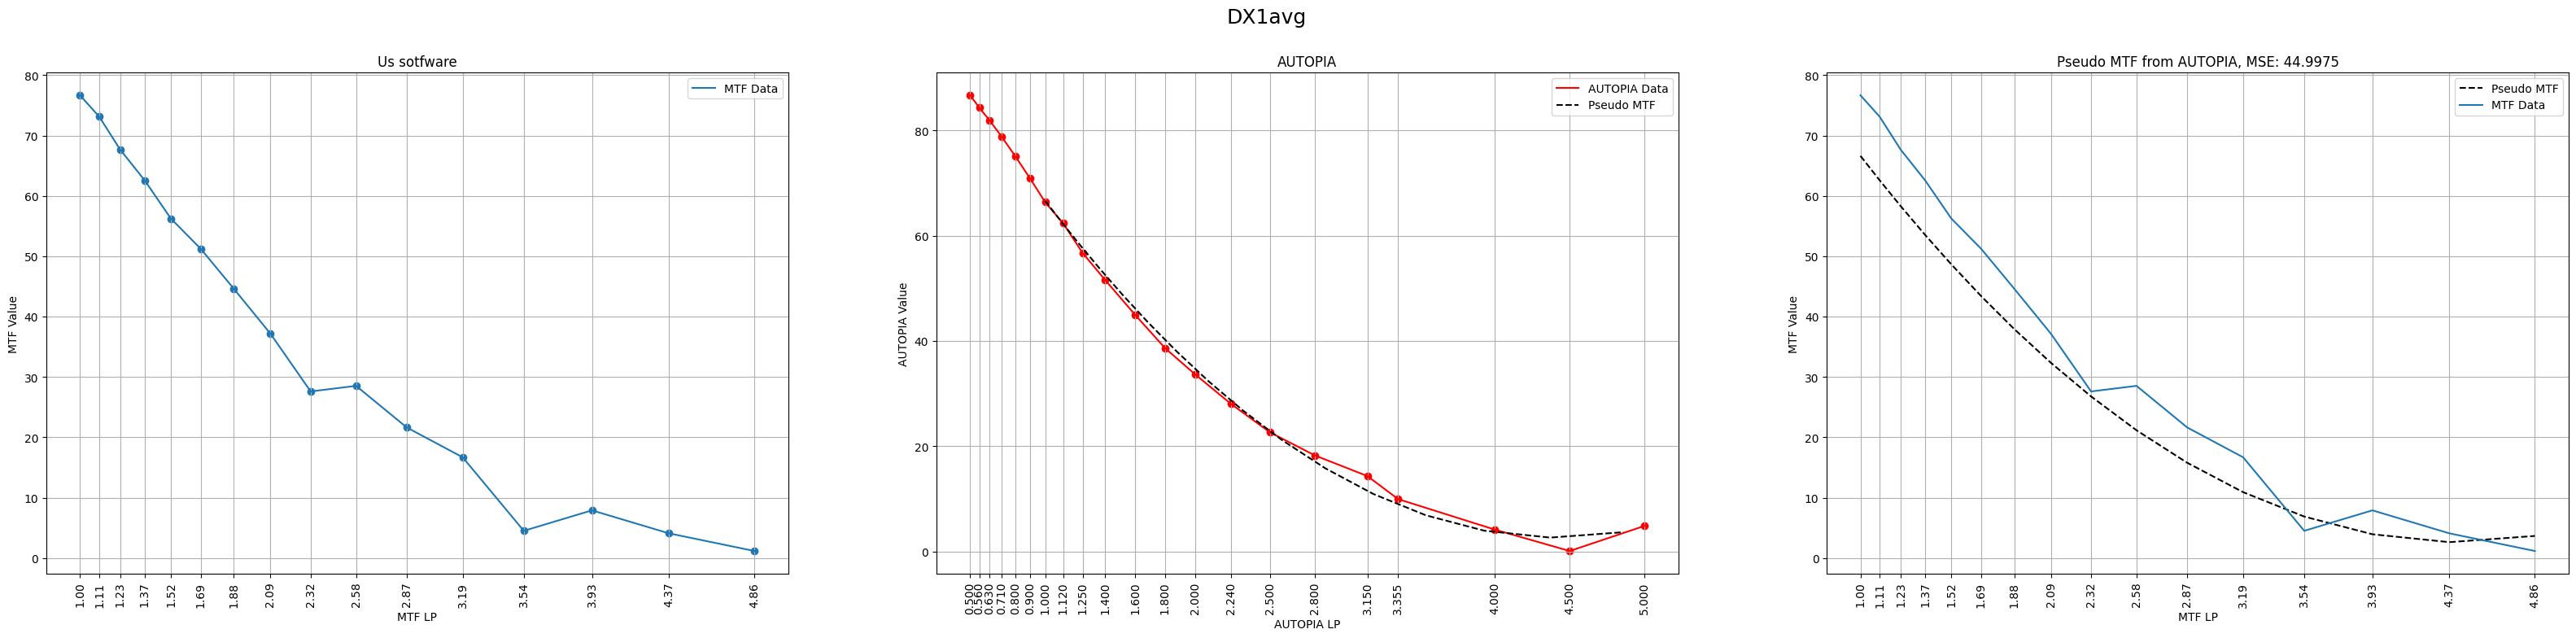

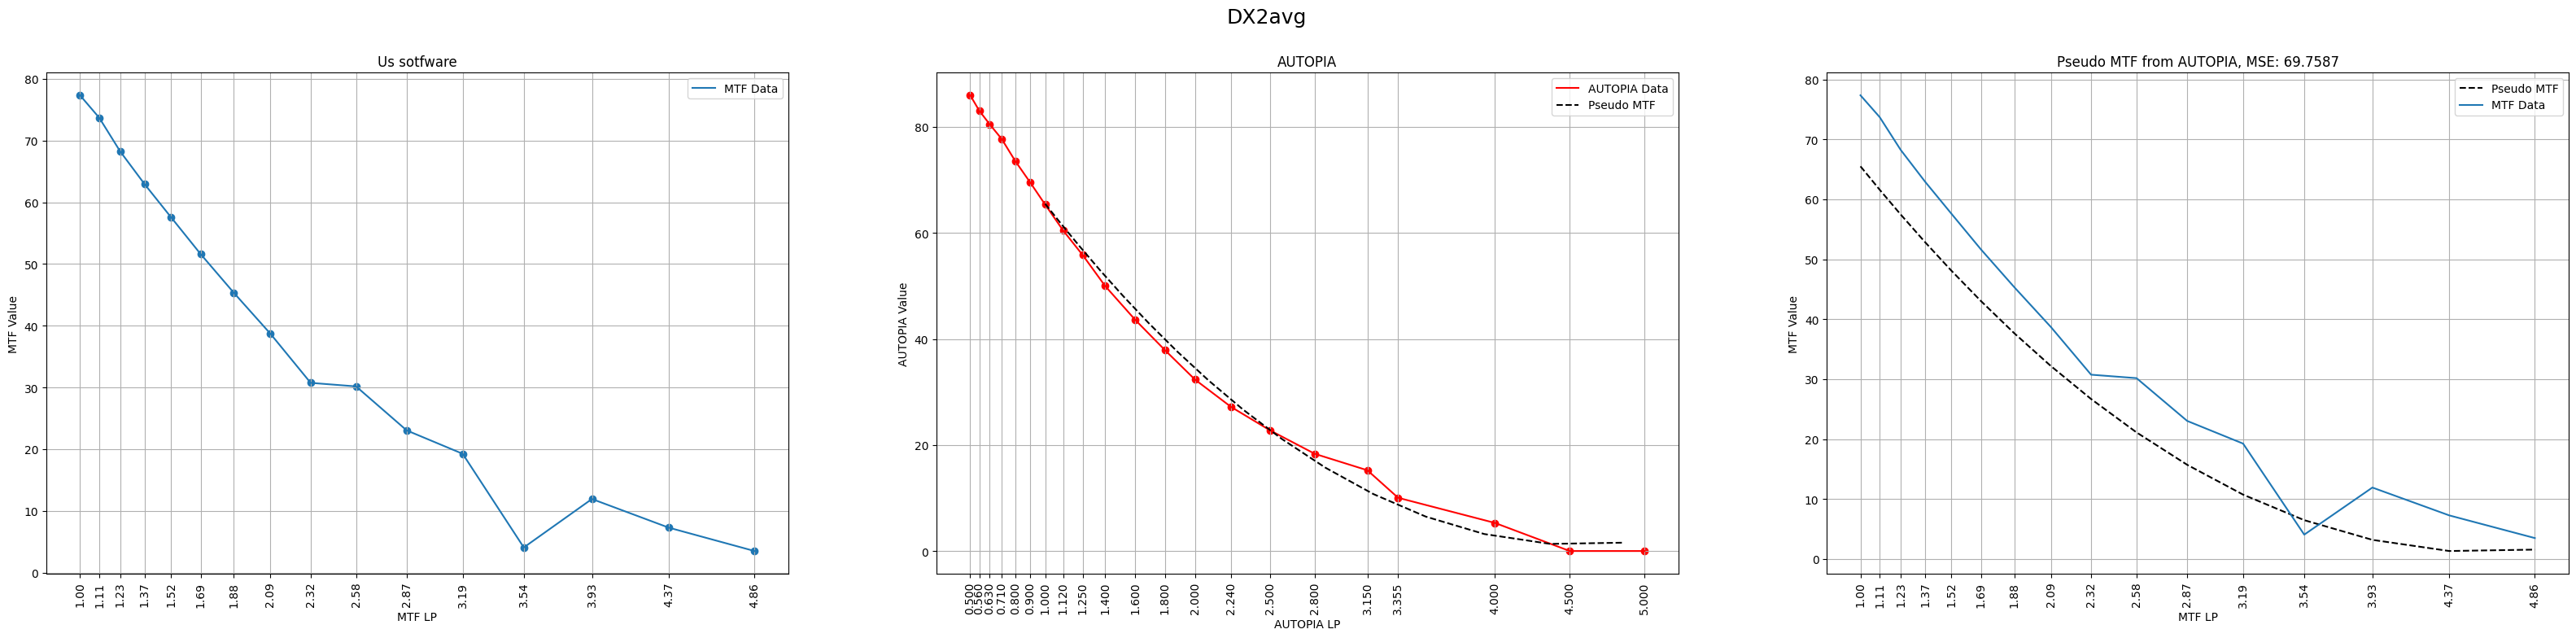

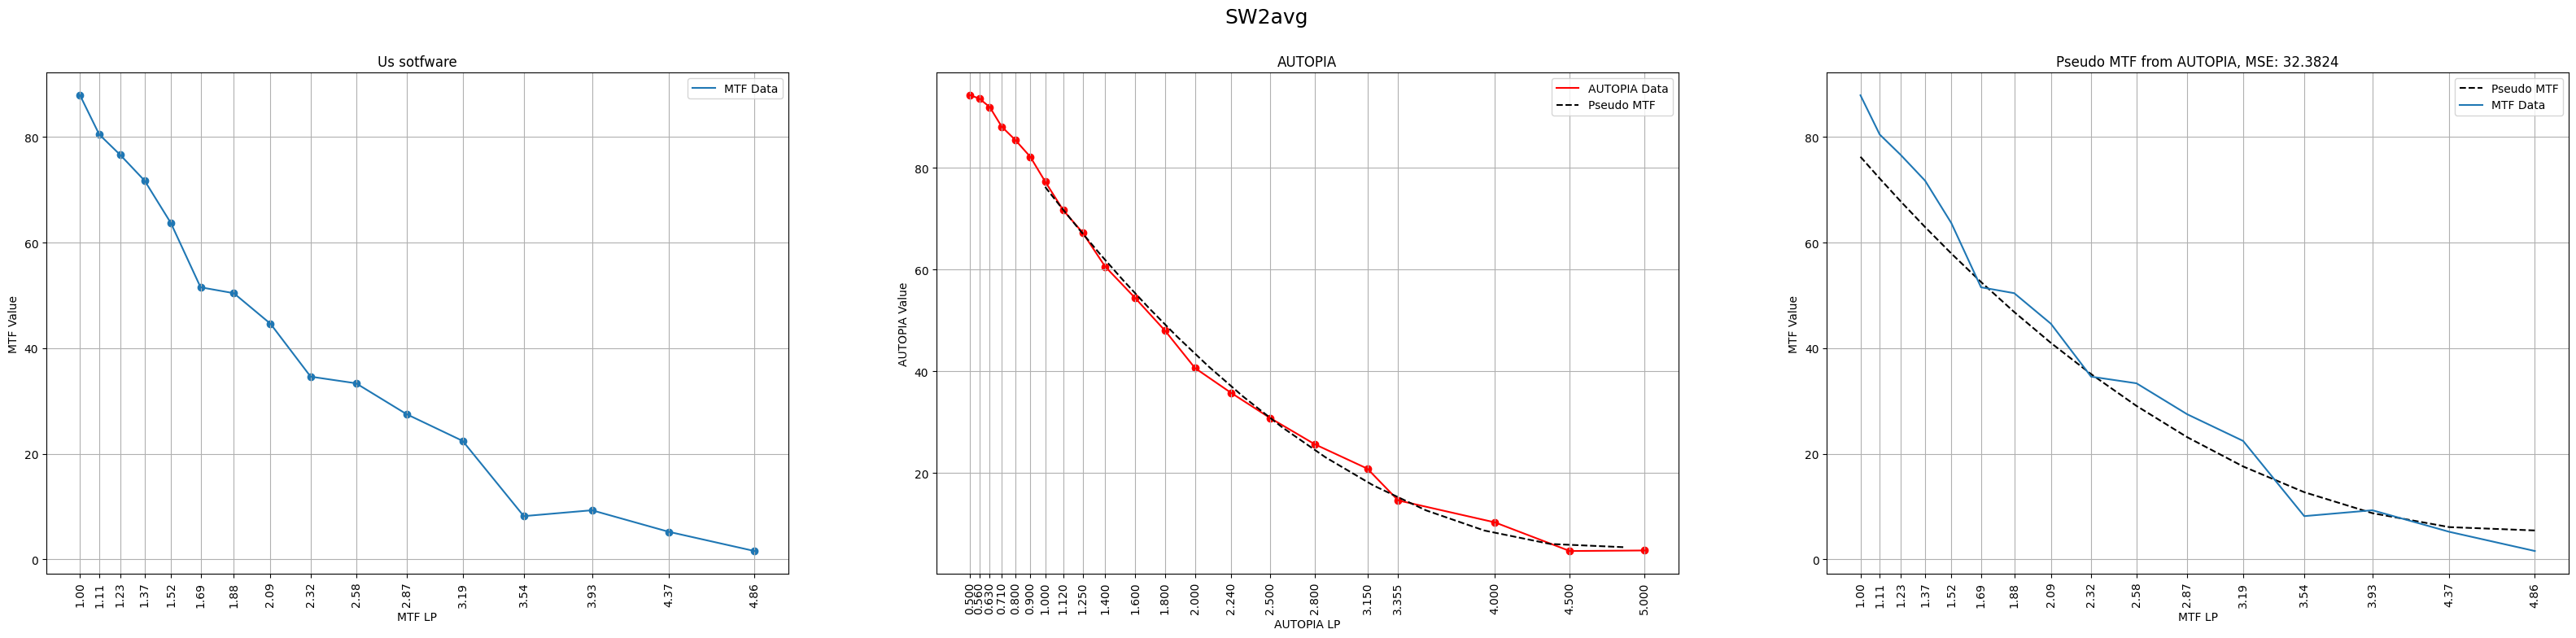

Error for Mean0.20 method: 49.0462


In [23]:
mtf_df020 = pd.read_excel("BAR_eval/MTF_data_0.2mean.xlsx")
mtf_data020 = []
for col in columns :
    mtf_data020.append(mtf_df020[f"{col}"].to_numpy()[1:])
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data020))
print(f"Error for Mean0.20 method: {np.array(avg_err).mean():.4f}")

### Mean 0.25 method

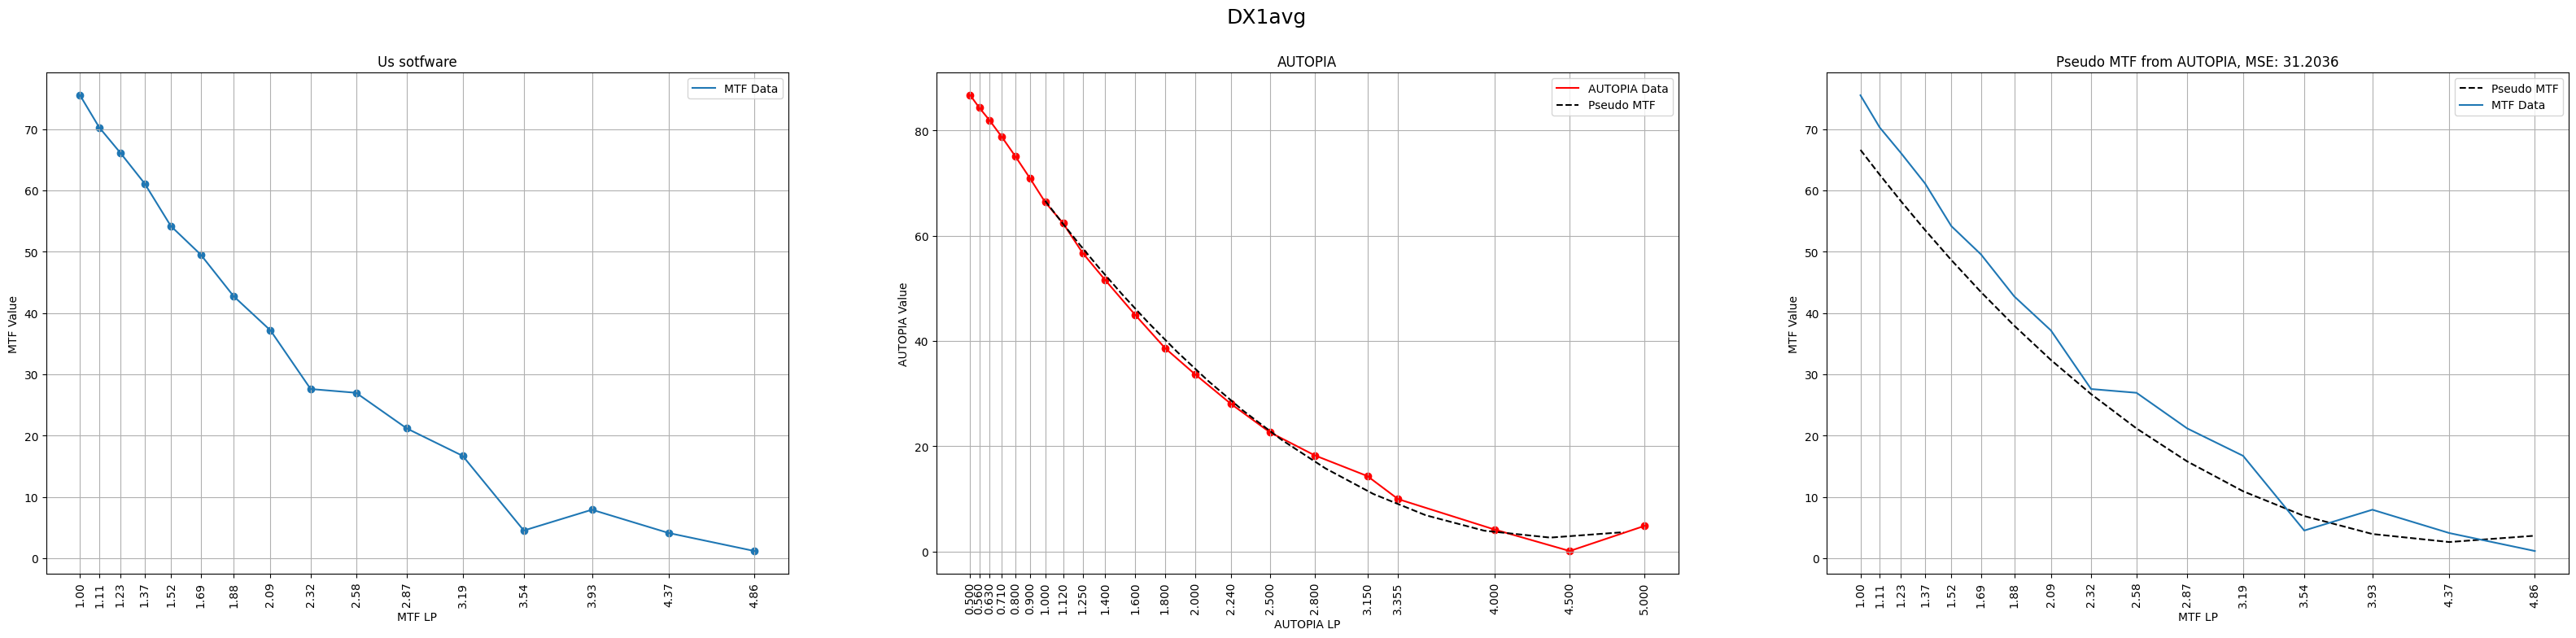

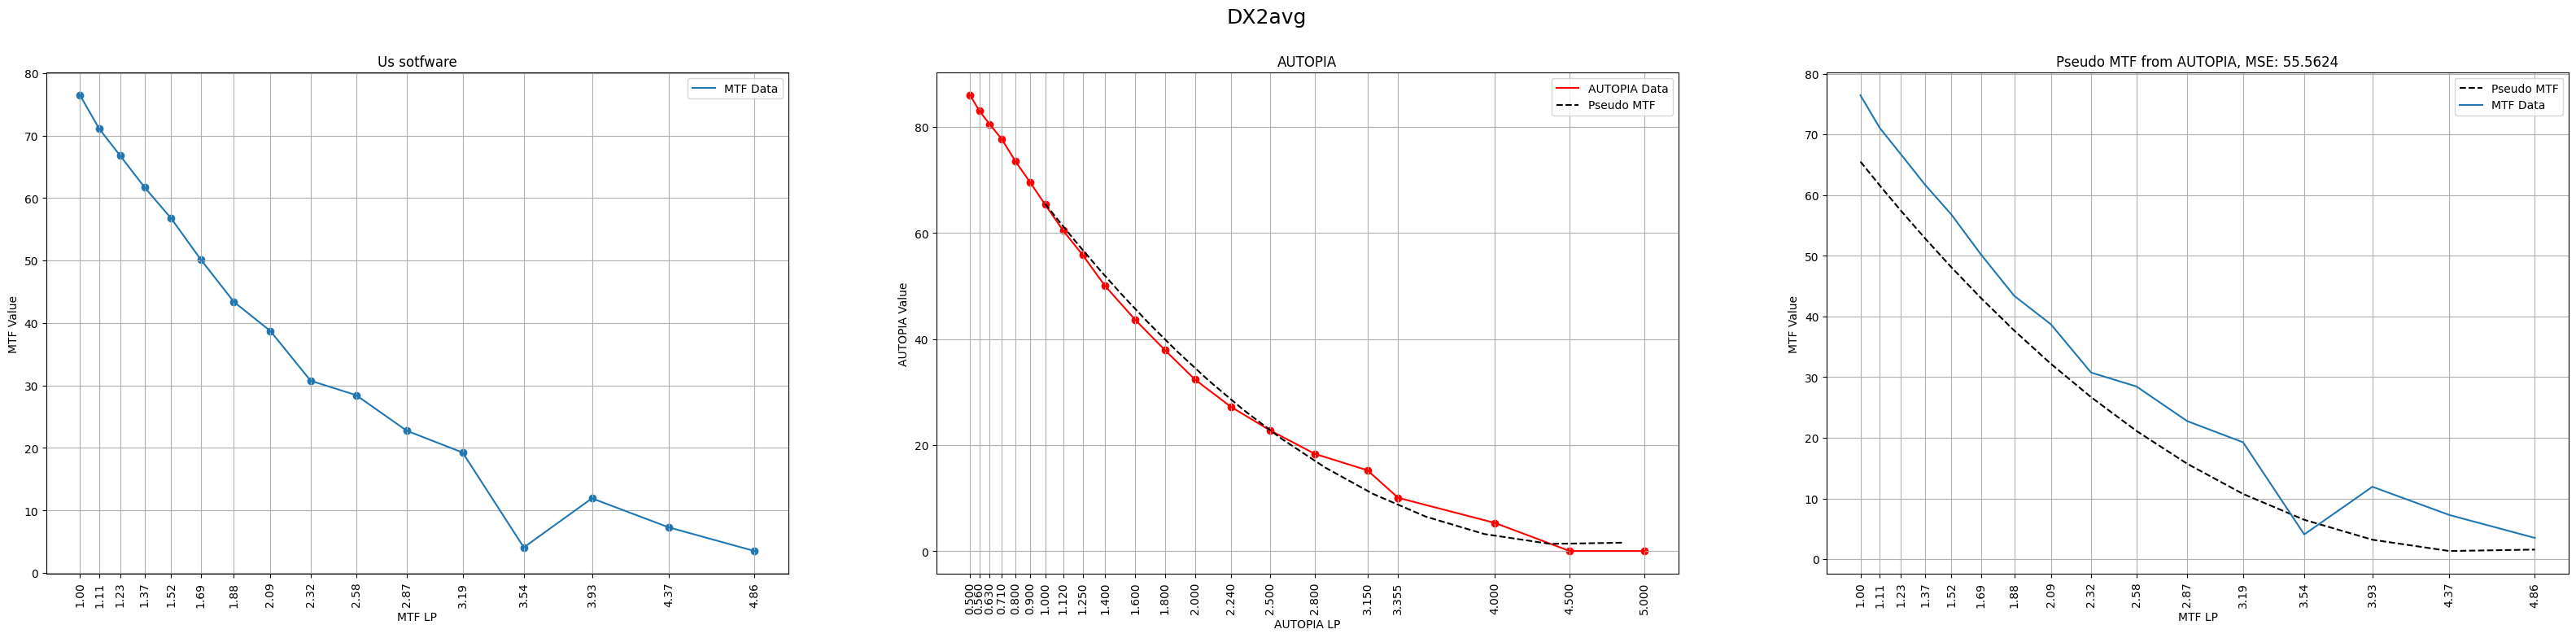

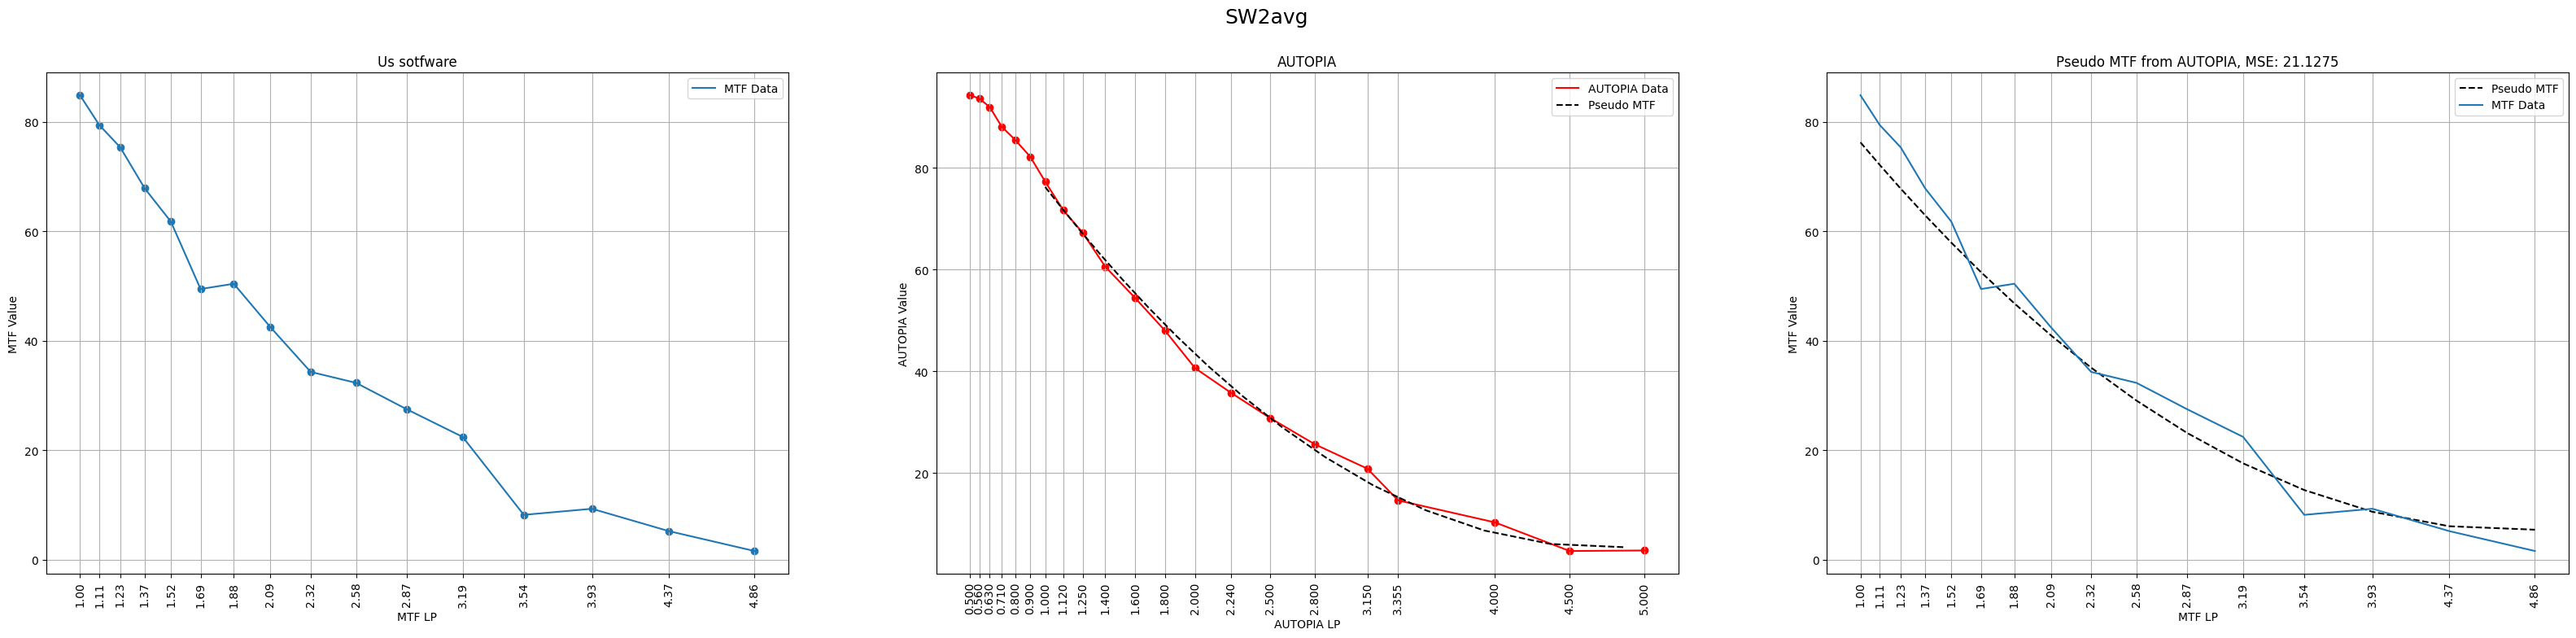

Error for Mean0.25 method: 35.9645


In [24]:
mtf_df025 = pd.read_excel("BAR_eval/MTF_data_0.25mean.xlsx")
mtf_data025 = []
for col in columns :
    mtf_data025.append(mtf_df025[f"{col}"].to_numpy()[1:])
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data025))
print(f"Error for Mean0.25 method: {np.array(avg_err).mean():.4f}")

### Mean 0.30 method 

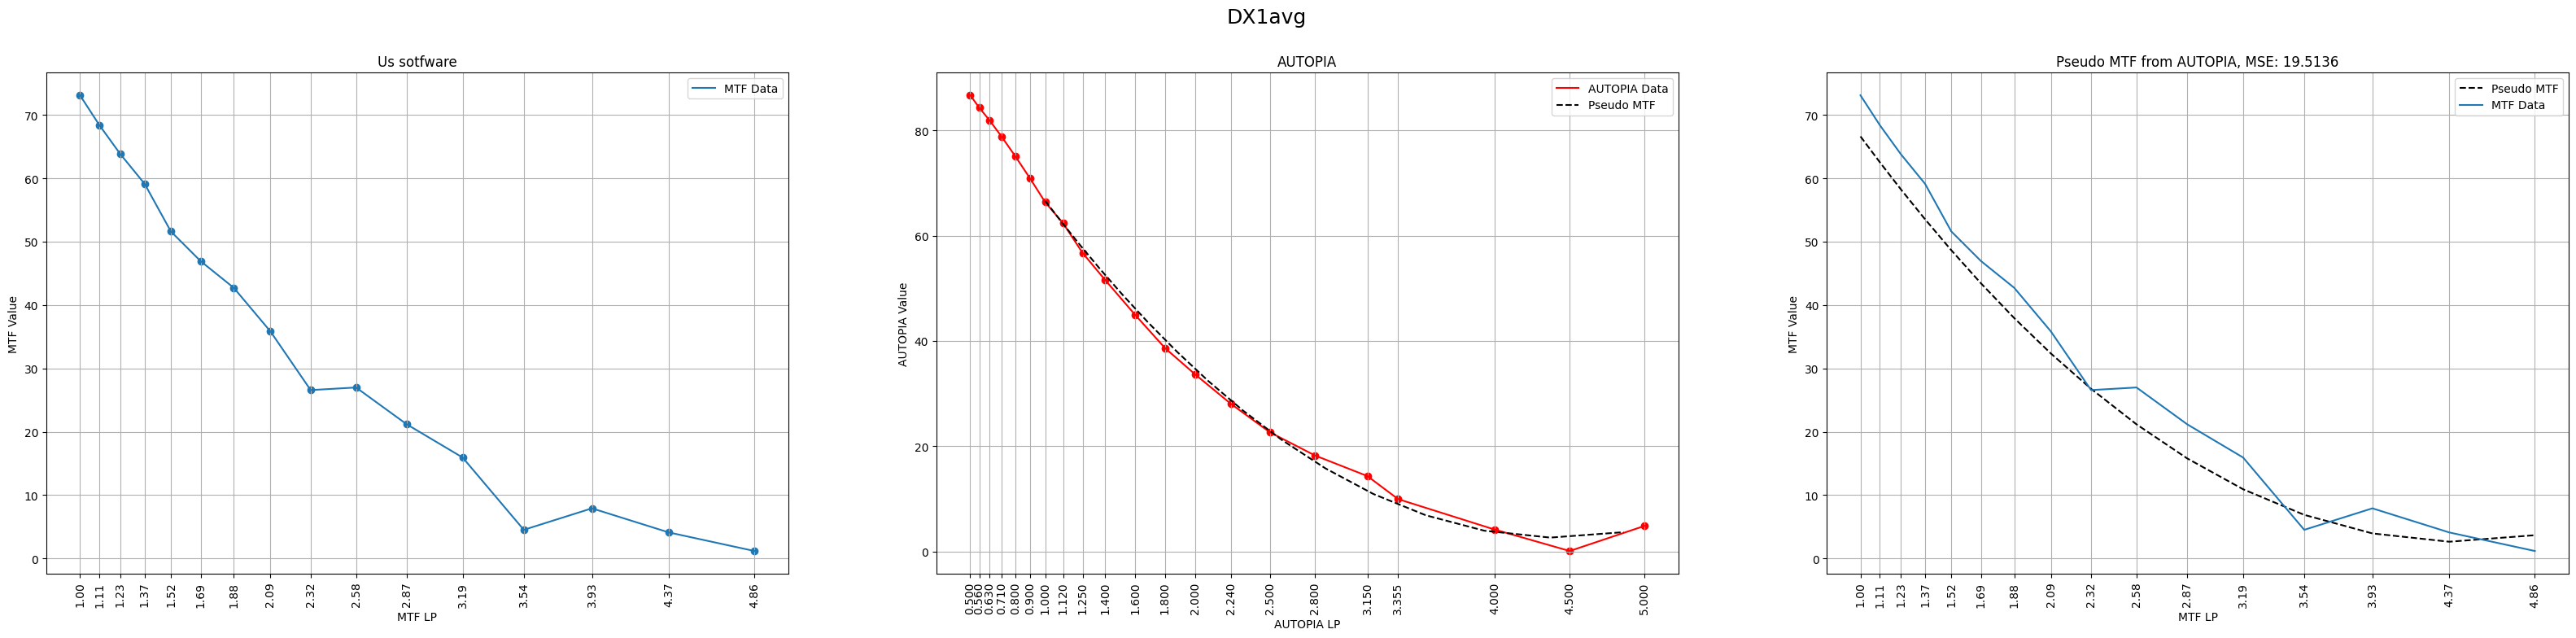

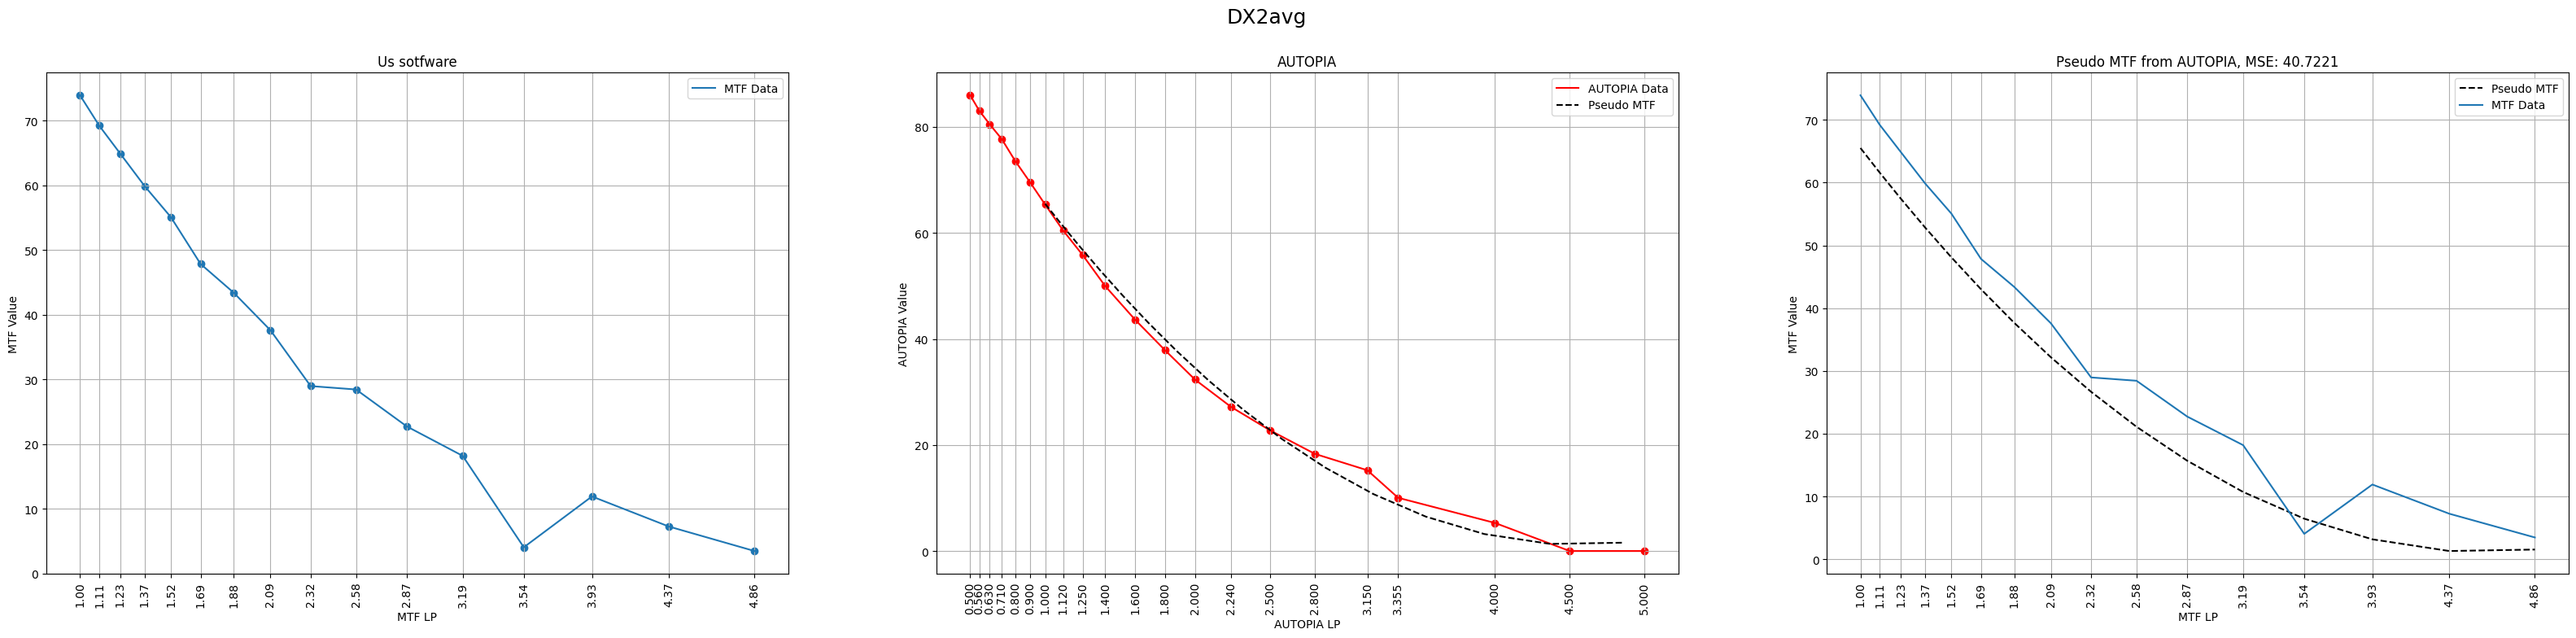

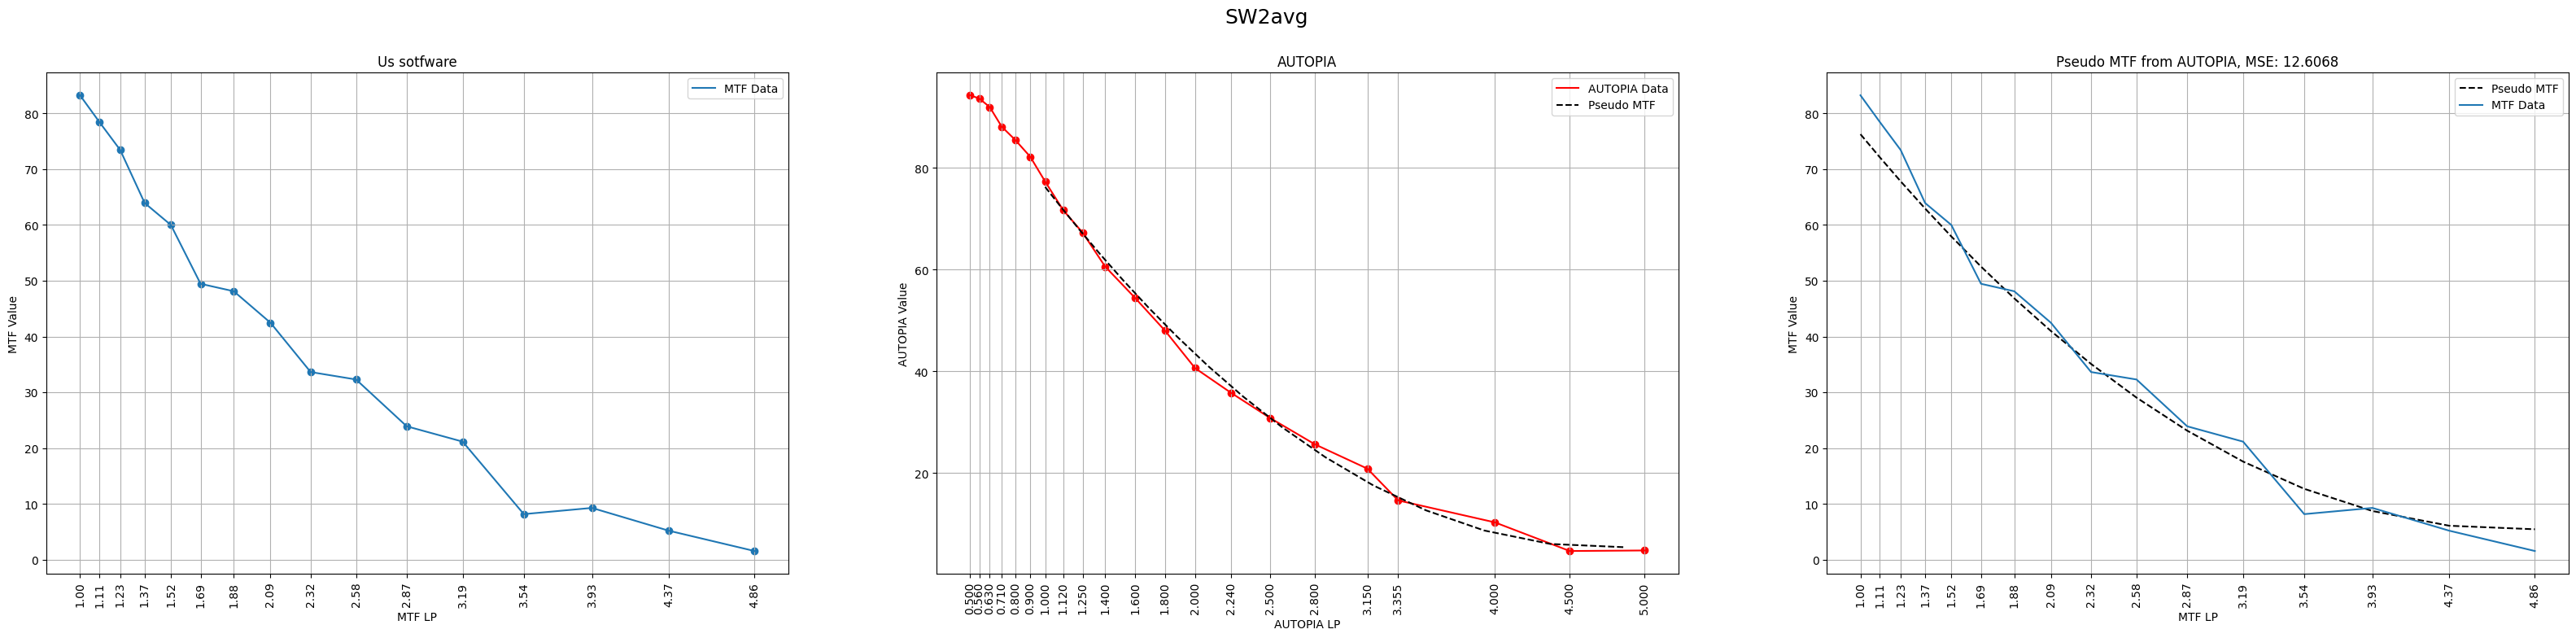

Error for Mean0.30 method: 24.2809


In [25]:
mtf_df030 = pd.read_excel("BAR_eval/MTF_data_0.3mean.xlsx")
mtf_data030 = []
for col in columns :
    mtf_data030.append(mtf_df030[f"{col}"].to_numpy()[1:])
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data030))
print(f"Error for Mean0.30 method: {np.array(avg_err).mean():.4f}")

## Result

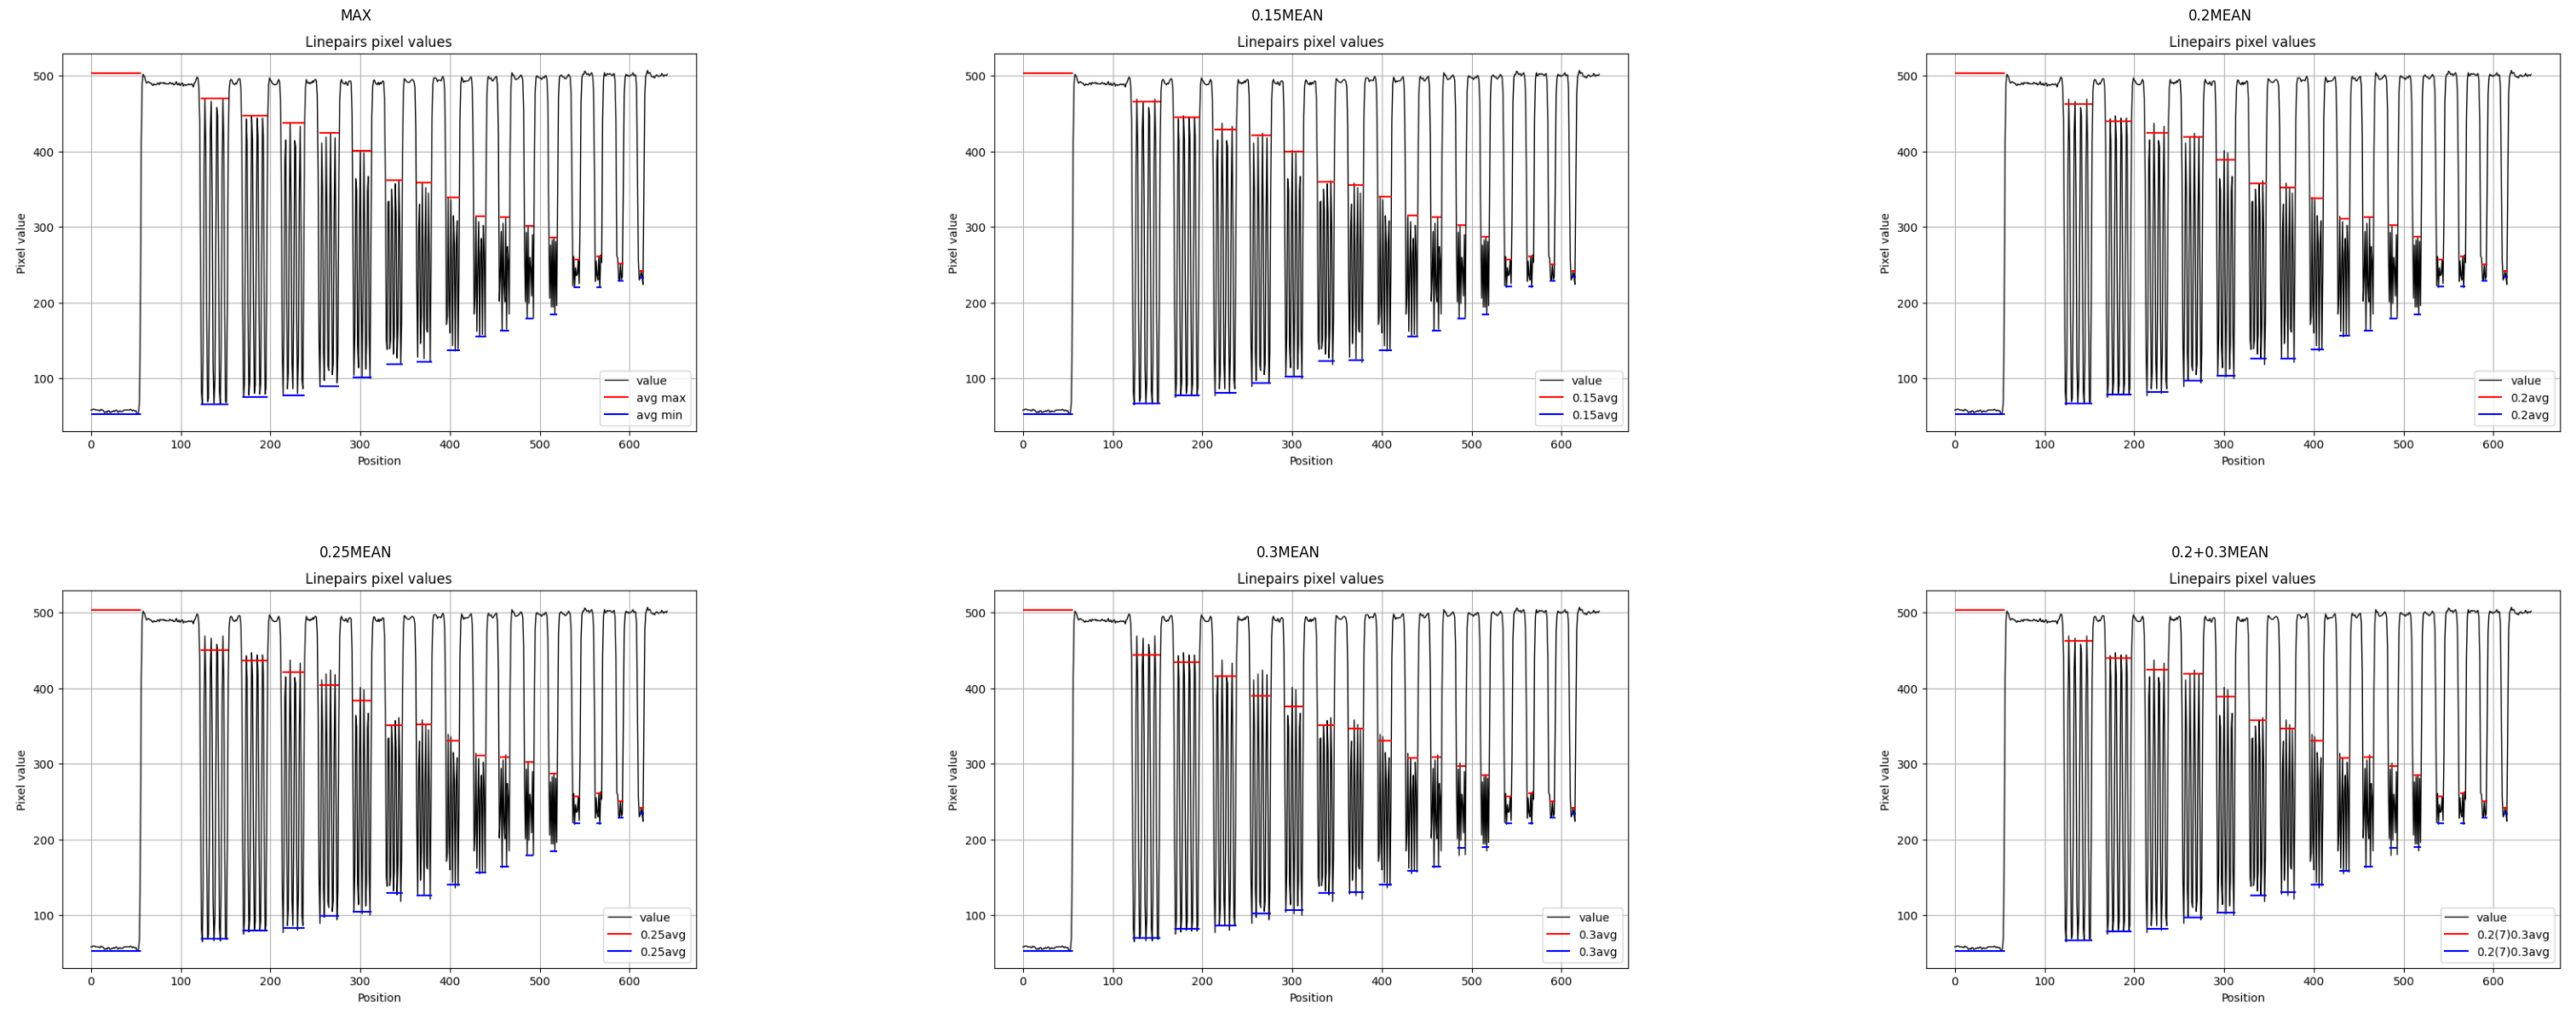

In [26]:
from PIL import Image

cols = ["MAX", "0.15MEAN", "0.2MEAN", "0.25MEAN", "0.3MEAN", "0.2+0.3MEAN"]
plt.figure(figsize=(40, 15))
for idx, col in enumerate(cols, start=1) :
    img = np.array(Image.open(f"BAR_eval\images\{col}\sw2bar2.png"))
    plt.subplot(2, 3, idx)
    plt.title(f"{col}")
    plt.imshow(img)
    plt.axis(False)

In [27]:
res = pd.read_excel("BAR_eval/MTF_eval_result.xlsx")
res

,Method,MSE error
0,Max,72.8246
1,M0.15,60.3213
2,M0.2,49.0462
3,M0.25,35.9645
4,M0.3,24.2809
5,M0.2(7)0.3,44.3746


- Mean0.30 is the lowest error. Should we use it? (No).
- Because if we look at the line pair plotting graph, it does not look good for cutting.
- In case we humans do this task, I think Mean0.20 looks like the best fit.
- Then we apply Mean0.20 for LP less than Number 7 else Mean0.30.
- It lowers the error from Mean0.20: 49.0462 to 44.3746.
- This method looks good for now.

### Mean0.30 (LP<7) with Mean0.30 method

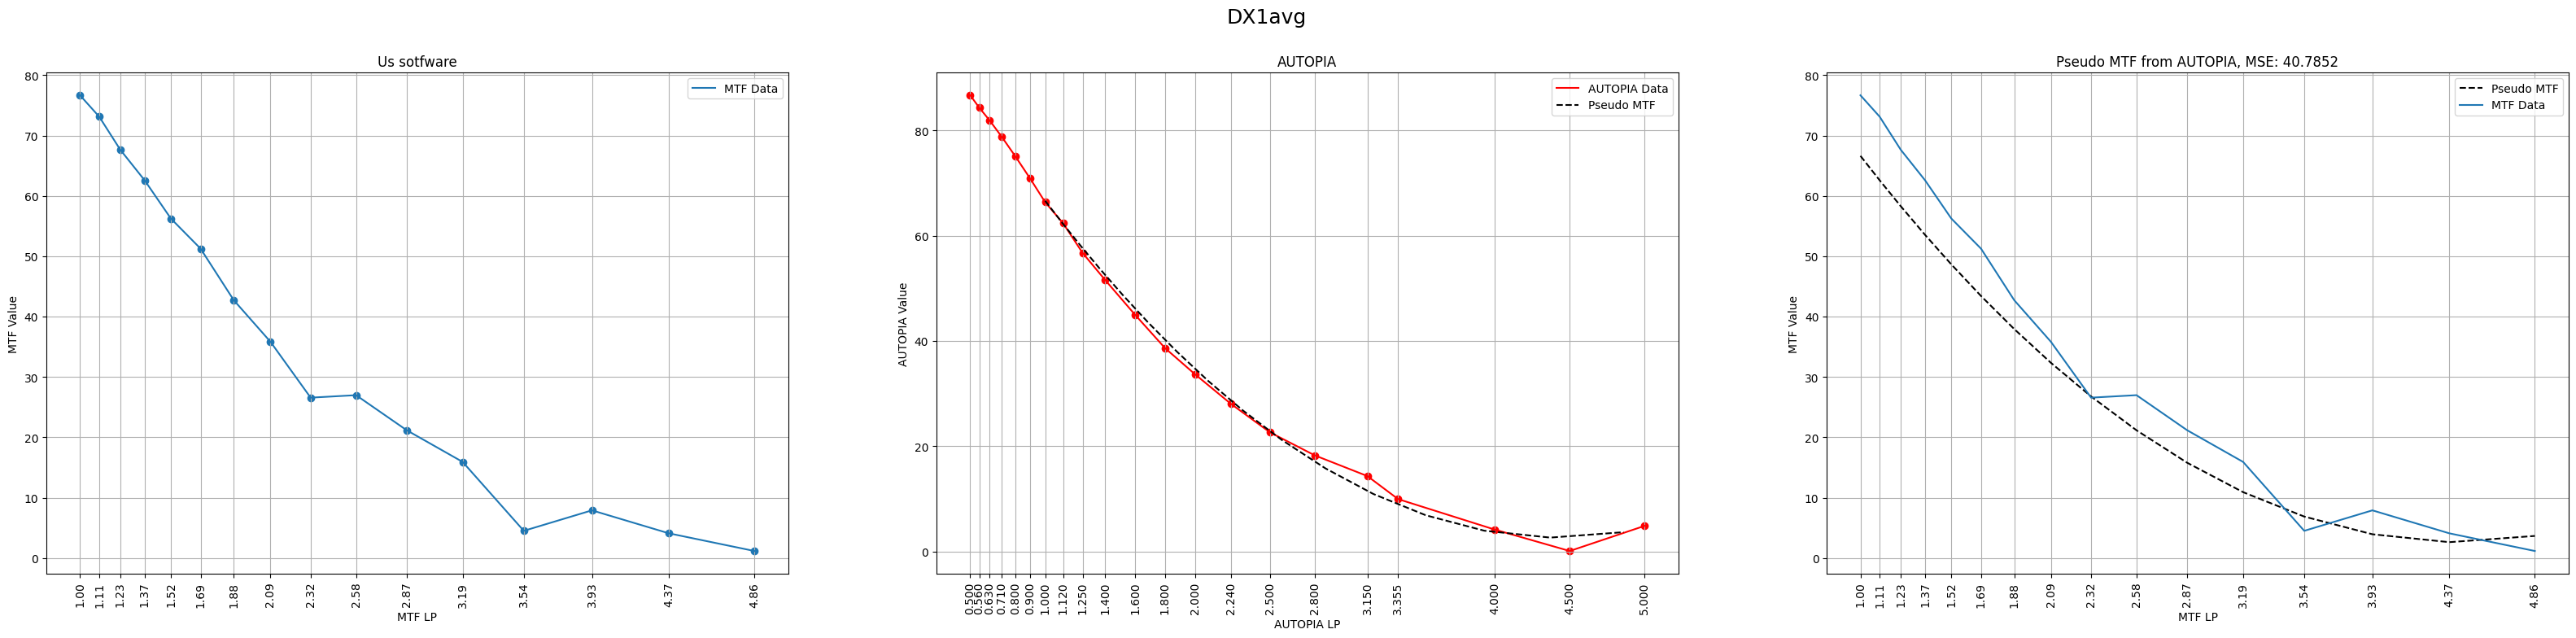

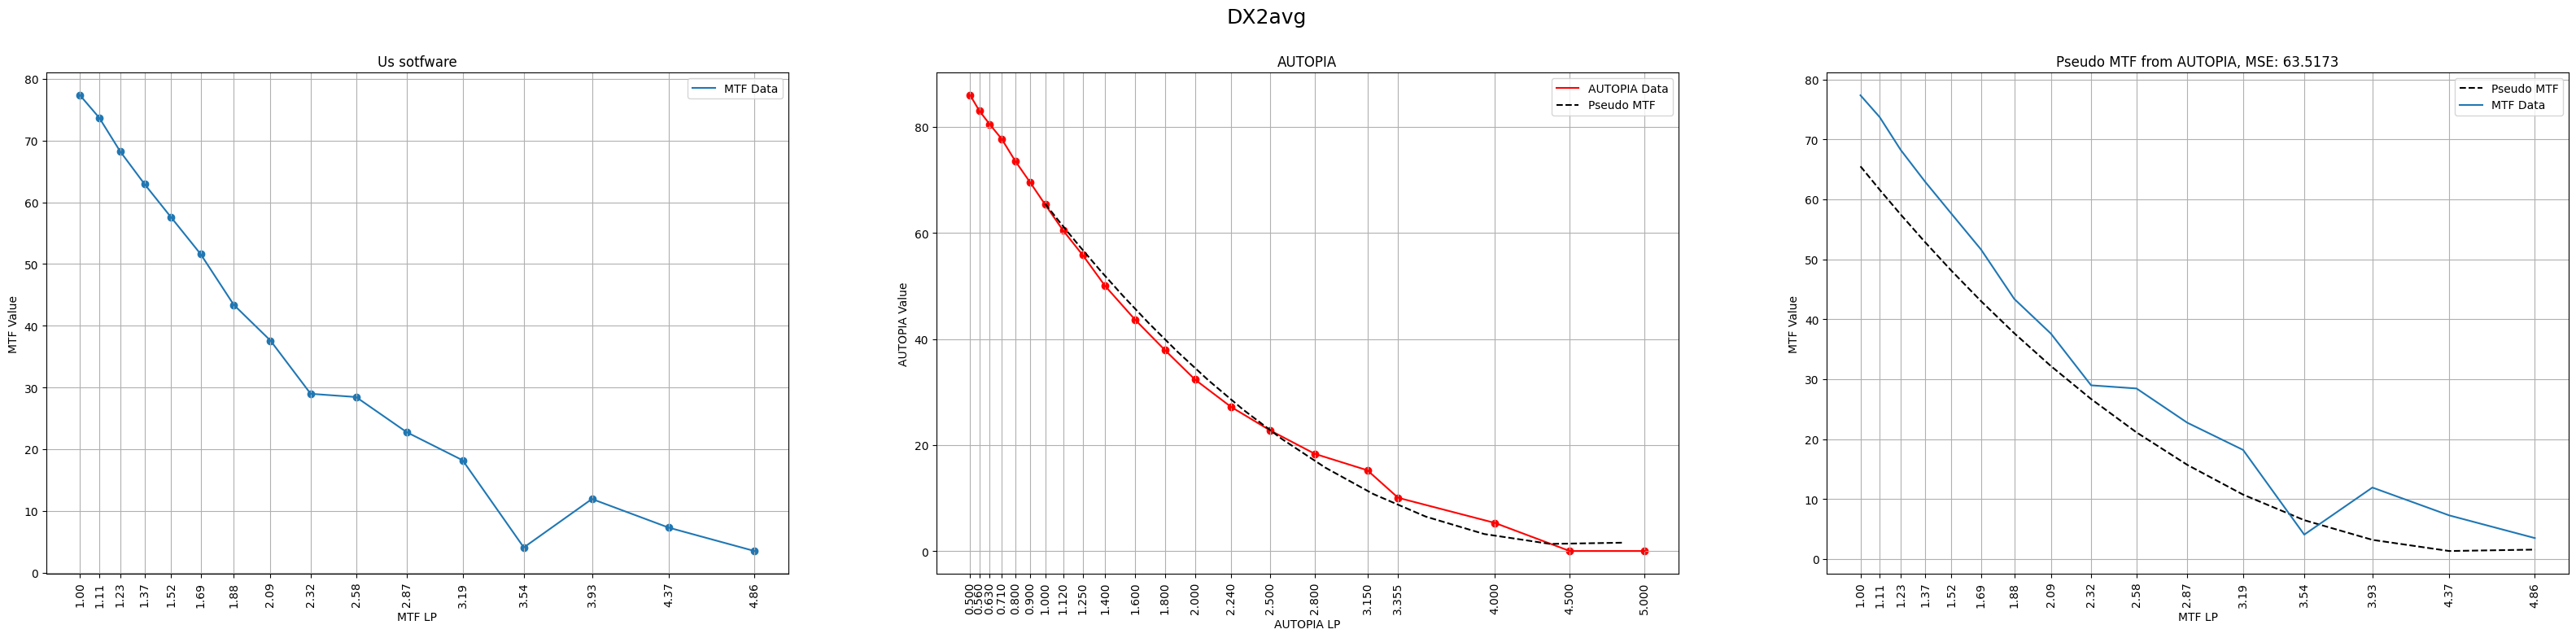

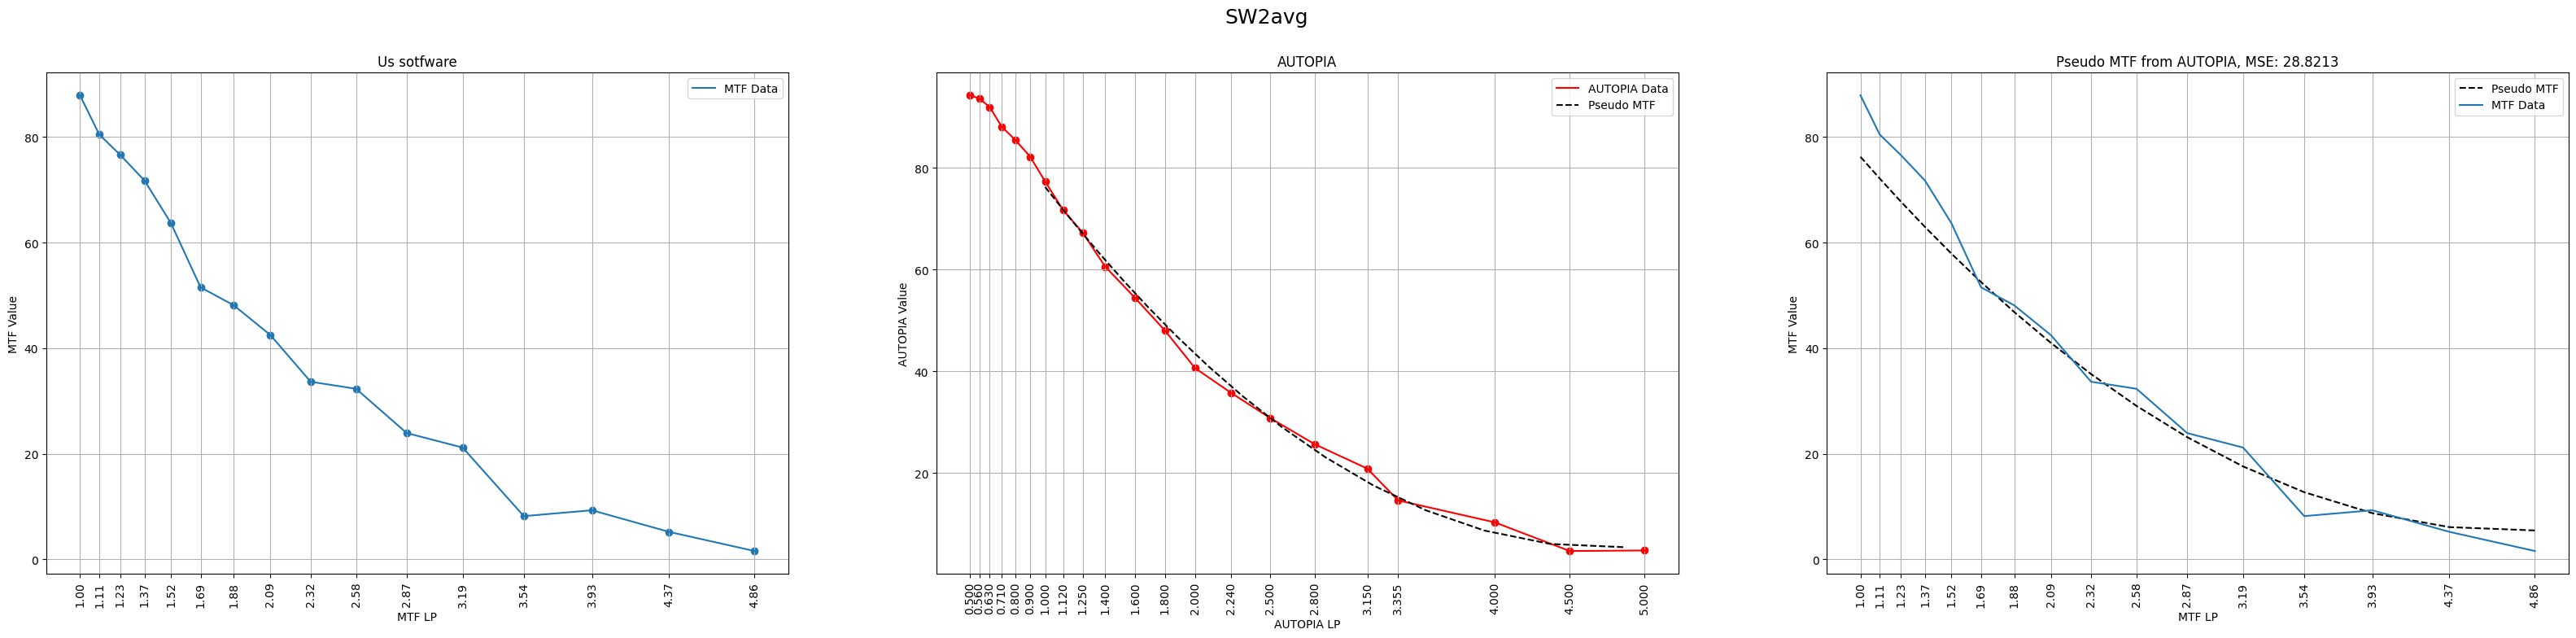

Error for Mean0.20(7)0.30 method: 44.3746


In [28]:
mtf_df0273 = pd.read_excel("BAR_eval/MTF_data_0.2mean(7)0.3mean.xlsx")
mtf_data0273 = []
for col in columns :
    mtf_data0273.append(mtf_df0273[f"{col}"].to_numpy()[1:])
avg_err = []
for idx in range(3) :
    avg_err.append(plot_result(idx, mtf_data0273))
print(f"Error for Mean0.20(7)0.30 method: {np.array(avg_err).mean():.4f}")